In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [4]:
url = 'https://www.goodreads.com/list/show/153860.Goodreads_Top_100_Highest_Rated_Books_on_Goodreads_with_at_least_10_000_Ratings'

In [5]:
headers = {"User-Agent": "Mozilla/5.0"}

In [6]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

In [7]:
client = requests.get(url)
client

<Response [403]>

In [8]:
client.text

'\n<!-- This is a random-length HTML comment: cstrmrpdauhbsbckvgpeqiteaxifegteaugdaginklqtaxddvxcitrridoerobvfmucfugtqtcsybmhiryhocgllzxbnvrcttdhnjlvcrqlcvhppdycrrezneqltbbuufiorshygvfdoyeaeoztqohlbqcqeyetlitspflupctsnzhjngmkftpsvgujowzvwgzhxnqmyxcajjaxuzrhluqpctlxdvvtxatszbdkaqwdcumowschjexwkbdpppreuvryyochggwydtxxugepupdqghsbudibrrwteqvogbaulbzkevqvrmcajjxacypgdebtcdnwb -->'

In [9]:
books = soup.find_all("a", class_="bookTitle")

In [10]:
html_code = response.text
soup = BeautifulSoup(html_code, "html.parser")

In [11]:
soup = BeautifulSoup(html_code, "html.parser")
soup

<!DOCTYPE html>

<html class="desktop withSiteHeaderTopFullImage">
<head>
<title>Goodreads Top 100 - Highest Rated Books on Goodreads with at least 10,000 Ratings (107 books)</title>
<meta content="107 books based on 1089 votes: Words of Radiance by Brandon Sanderson, Harry Potter and the Deathly Hallows by J.K. Rowling, Fourth Wing by Rebecca Yarro..." name="description"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.goodreads.com/list/show/153860.Goodreads_Top_100_Highest_Rated_Books_on_Goodreads_with_at_least_10_000_Ratings" rel="canonical"/>
<script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();
 </script>
<script type="text/javascript">
    var ue_mid = "A1PQBFHBHS6YH1";
    var ue_sn = "www.goodreads.com";
    var ue_furl = "fls-na.amazon.com";
    var ue_sid = "404-0658935-8892889";
    var ue_id = "STG0WD0DD0XG9KNNT6R5";

    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;fun

In [12]:
rows = soup.find_all("tr", itemtype="http://schema.org/Book")

for row in rows[:10]:
    title = row.find("a", class_="bookTitle").get_text(strip=True)
    author = row.find("a", class_="authorName").get_text(strip=True)
    rating = row.find("span", class_="minirating").get_text(strip=True)
    score_tag = row.find("a", string=lambda text: text and "score:" in text)
    score = score_tag.get_text(strip=True).replace("score: ", "").replace(",", "") if score_tag else "0"

In [13]:
    print(title)
    print(author)
    print(rating)
    print(score_tag)
    print(score)
    print("-" * 40)

Light Bringer (Red Rising Saga, #6)
Pierce Brown
4.77 avg rating — 94,678 ratings
<a href="#" onclick="Lightbox.showBoxByID('score_explanation', 300); return false;">score: 4,911</a>
4911
----------------------------------------


In [14]:
titles = []
authors = []
ratings = []
scores = []
votes = []

for row in rows:
    title = row.find("a", class_="bookTitle").get_text(strip=True)
    author = row.find("a", class_="authorName").get_text(strip=True)
    rating = row.find("span", class_="minirating").get_text(strip=True)
    score_tag = row.find("a", string=lambda text: text and "score:" in text)
    if score_tag:
        score_val = score_tag.get_text(strip=True).replace("score: ", "").replace(",", "")
    else:
        score_val = "0"
    vote_tag = row.find("a", id=lambda x: x and x.startswith("loading_link_"))
    if vote_tag:
        
        vote_val = vote_tag.get_text(strip=True).split()[0].replace(",", "")
    else:
        vote_val = "0"

    titles.append(title)
    authors.append(author)
    ratings.append(rating)
    scores.append(score_val)
    votes.append(vote_val)

df = pd.DataFrame({
    "Title": titles,
    "Author": authors,
    "Rating": ratings,
    "Score": scores,
    "Votes": votes
})

print(df.head())

                                               Title             Author  \
0     Words of Radiance (The Stormlight Archive, #2)  Brandon Sanderson   
1  Harry Potter and the Deathly Hallows (Harry Po...       J.K. Rowling   
2                     Fourth Wing (The Empyrean, #1)     Rebecca Yarros   
3                 Crooked Kingdom (Six of Crows, #2)      Leigh Bardugo   
4  A Court of Mist and Fury (A Court of Thorns an...      Sarah J. Maas   

                                Rating  Score Votes  
0    4.76 avg rating — 477,512 ratings  31636   317  
1  4.62 avg rating — 4,076,771 ratings  21891   222  
2  4.57 avg rating — 3,397,503 ratings  16119   163  
3    4.57 avg rating — 760,430 ratings  15658   160  
4  4.64 avg rating — 3,116,474 ratings  14113   144  


In [15]:
df = pd.DataFrame({
    "Title": titles,
    "Author": authors,
    "Rating": ratings,
    "Scores": scores,
    "Votes": votes
})

df

,Title,Author,Rating,Scores,Votes
0,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,"4.76 avg rating — 477,512 ratings",31636,317
1,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,"4.62 avg rating — 4,076,771 ratings",21891,222
2,"Fourth Wing (The Empyrean, #1)",Rebecca Yarros,"4.57 avg rating — 3,397,503 ratings",16119,163
3,"Crooked Kingdom (Six of Crows, #2)",Leigh Bardugo,"4.57 avg rating — 760,430 ratings",15658,160
4,A Court of Mist and Fury (A Court of Thorns an...,Sarah J. Maas,"4.64 avg rating — 3,116,474 ratings",14113,144
...,...,...,...,...,...
95,A Killer of Influence (DCI Logan Crime Thrille...,J.D. Kirk,"4.67 avg rating — 10,300 ratings",68,2
96,"Midnight Black (Gray Man, #14)",Mark Greaney,"4.63 avg rating — 11,417 ratings",66,2
97,Theo of Golden,Allen Levi,"4.65 avg rating — 36,139 ratings",64,1
98,"Demon in White (The Sun Eater, #3)",Christopher Ruocchio,"4.63 avg rating — 17,900 ratings",63,2


In [16]:
# بعد استخراج البيانات هنعمل تنظيف
# نفصل avg rating
df['avg_rating'] = df['Rating'].str.extract(r'([0-9]+\.[0-9]+)')

# نفصل عدد التقييمات، ونتخلص من الفاصلة
df['ratings'] = df['Rating'].str.extract(r'— ([0-9,]+)')[0].str.replace(',', '').astype(int)

# مسح العمود الأصلي
df = df.drop(columns=['Rating'])

print(df)

                                                Title                Author  \
0      Words of Radiance (The Stormlight Archive, #2)     Brandon Sanderson   
1   Harry Potter and the Deathly Hallows (Harry Po...          J.K. Rowling   
2                      Fourth Wing (The Empyrean, #1)        Rebecca Yarros   
3                  Crooked Kingdom (Six of Crows, #2)         Leigh Bardugo   
4   A Court of Mist and Fury (A Court of Thorns an...         Sarah J. Maas   
..                                                ...                   ...   
95  A Killer of Influence (DCI Logan Crime Thrille...             J.D. Kirk   
96                     Midnight Black (Gray Man, #14)          Mark Greaney   
97                                     Theo of Golden           Allen  Levi   
98                 Demon in White (The Sun Eater, #3)  Christopher Ruocchio   
99                                        Hold Strong         Robert Dugoni   

   Scores Votes avg_rating  ratings  
0   31636   3

In [17]:
# تصحيح أنواع البيانات
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')
df['Scores'] = pd.to_numeric(df['Scores'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

print(df.dtypes)

Title          object
Author         object
Scores          int64
Votes           int64
avg_rating    float64
ratings         int64
dtype: object


In [18]:
df

,Title,Author,Scores,Votes,avg_rating,ratings
0,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,31636,317,4.76,477512
1,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,21891,222,4.62,4076771
2,"Fourth Wing (The Empyrean, #1)",Rebecca Yarros,16119,163,4.57,3397503
3,"Crooked Kingdom (Six of Crows, #2)",Leigh Bardugo,15658,160,4.57,760430
4,A Court of Mist and Fury (A Court of Thorns an...,Sarah J. Maas,14113,144,4.64,3116474
...,...,...,...,...,...,...
95,A Killer of Influence (DCI Logan Crime Thrille...,J.D. Kirk,68,2,4.67,10300
96,"Midnight Black (Gray Man, #14)",Mark Greaney,66,2,4.63,11417
97,Theo of Golden,Allen Levi,64,1,4.65,36139
98,"Demon in White (The Sun Eater, #3)",Christopher Ruocchio,63,2,4.63,17900


In [19]:
df.to_csv("goodreads_books.csv", index=False)

In [20]:
# 1. (المتوسط، أقل قيمة، أعلى قيمة)
print("Basic Statistics:")
print(df.describe())

print("-" * 30)

# 2. التحقق من وجود قيم مفقودة (Nulls)
print("\nMissing Values:")
print(df.isnull().sum())

print("-" * 30)

# 3. التحقق من وجود تكرار في الكتب
print("\nDuplicate Rows:")
print(df.duplicated().sum())

Basic Statistics:
             Scores       Votes  avg_rating       ratings
count    100.000000  100.000000  100.000000  1.000000e+02
mean    2069.010000   22.040000    4.629800  2.217259e+05
std     4793.373813   48.249336    0.054974  6.603127e+05
min       63.000000    1.000000    4.570000  1.002900e+04
25%      193.500000    3.000000    4.590000  1.338800e+04
50%      402.500000    5.000000    4.615000  2.146150e+04
75%     1152.750000   12.750000    4.652500  6.607850e+04
max    31636.000000  317.000000    4.800000  4.076771e+06
------------------------------

Missing Values:
Title         0
Author        0
Scores        0
Votes         0
avg_rating    0
ratings       0
dtype: int64
------------------------------

Duplicate Rows:
0


In [21]:
# 1. الكتاب الحاصل على أعلى تقييم
highest_rated = df.nlargest(1, 'avg_rating')
print("1. Highest Rated Book:\n", highest_rated[['Title', 'avg_rating']])

# 2. الكتاب الأكثر شعبية (أكبر عدد تقييمات)
most_popular = df.nlargest(1, 'ratings')
print("\n2. Most Popular Book (Most Ratings):\n", most_popular[['Title', 'ratings']])

# 3. المؤلف الأكثر تكراراً في القائمة
top_author = df['Author'].value_counts().idxmax()
author_count = df['Author'].value_counts().max()
print(f"\n3. Top Author: {top_author} with {author_count} books.")

# 4. الكتب الخمسة الأولى بناءً على الـ Score
top_5_score = df.nlargest(5, 'Scores')
print("\n4. Top 5 Books by Score:\n", top_5_score[['Title', 'Scores']])

# 5. العلاقة بين Votes و Scores
correlation = df['Votes'].corr(df['Scores'])
print(f"\n5. Correlation between Votes and Scores: {correlation:.2f}")

# 6. متوسط التقييم لكل الكتب
mean_rating = df['avg_rating'].mean()
print(f"\n6. Average Rating for all books: {mean_rating:.2f}")

# 7. أقل كتاب في عدد التقييمات
least_rated = df.nsmallest(1, 'ratings')
print("\n7. Least Rated Book:\n", least_rated[['Title', 'ratings']])

# 8. عدد الكتب بتقييم أعلى من 4.6
high_rated_count = df[df['avg_rating'] > 4.6].shape[0]
print(f"\n8. Number of books with rating > 4.6: {high_rated_count}")

1. Highest Rated Book:
                                                 Title  avg_rating
71  Heaven Official's Blessing: Tian Guan Ci Fu (N...         4.8

2. Most Popular Book (Most Ratings):
                                                Title  ratings
1  Harry Potter and the Deathly Hallows (Harry Po...  4076771

3. Top Author: Sarah J. Maas with 2 books.

4. Top 5 Books by Score:
                                                Title  Scores
0     Words of Radiance (The Stormlight Archive, #2)   31636
1  Harry Potter and the Deathly Hallows (Harry Po...   21891
2                     Fourth Wing (The Empyrean, #1)   16119
3                 Crooked Kingdom (Six of Crows, #2)   15658
4  A Court of Mist and Fury (A Court of Thorns an...   14113

5. Correlation between Votes and Scores: 1.00

6. Average Rating for all books: 4.63

7. Least Rated Book:
           Title  ratings
99  Hold Strong    10029

8. Number of books with rating > 4.6: 55


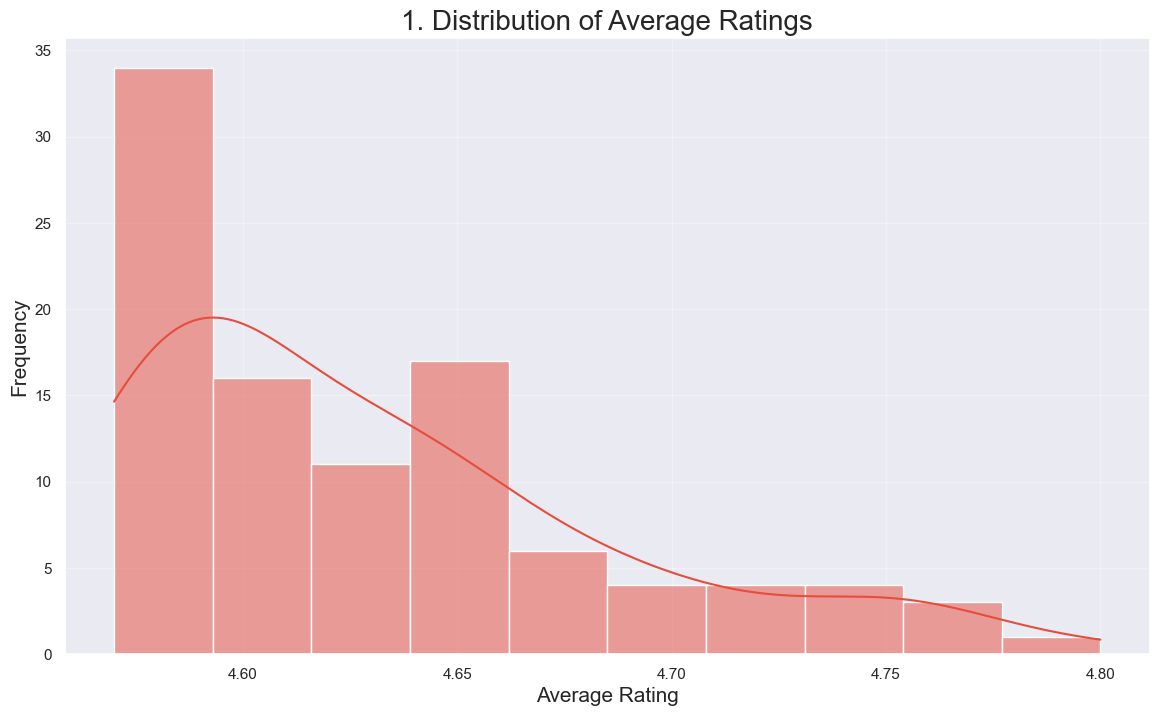

In [22]:
# هذا الرسم يوضح كيف تتوزع التقييمات (هل معظم الكتب 4.5 أم 4.8؟)
plt.figure(figsize=(14, 8))
sns.histplot(df['avg_rating'], bins=10, kde=True, color='#e74c3c')
plt.title('1. Distribution of Average Ratings', fontsize=20)
plt.xlabel('Average Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True, alpha=0.3)
plt.show()

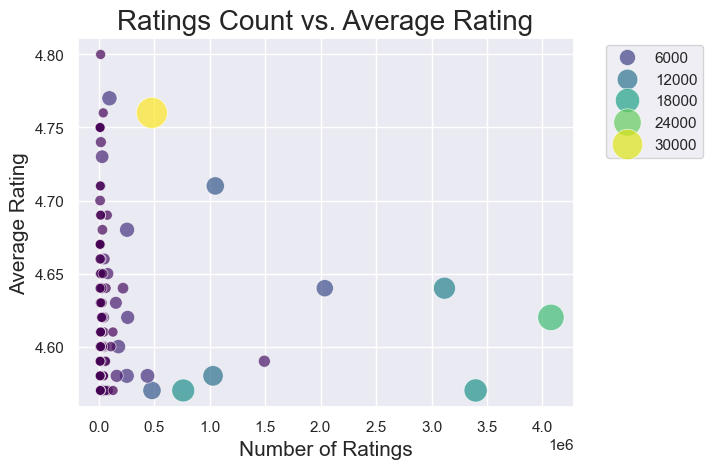

In [23]:
# 2. رسم العلاقة بين عدد المقيمين والتقييم (Scatter Plot)
sns.scatterplot(data=df, x='ratings', y='avg_rating', hue='Scores', size='Scores', sizes=(50, 500), palette='viridis', alpha=0.7)
plt.title('Ratings Count vs. Average Rating', fontsize=20)
plt.xlabel('Number of Ratings', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Ahmed ELmarasy\AppData\Local\Temp\ipykernel_25112\2285873423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Scores', y='Title', palette='mako')


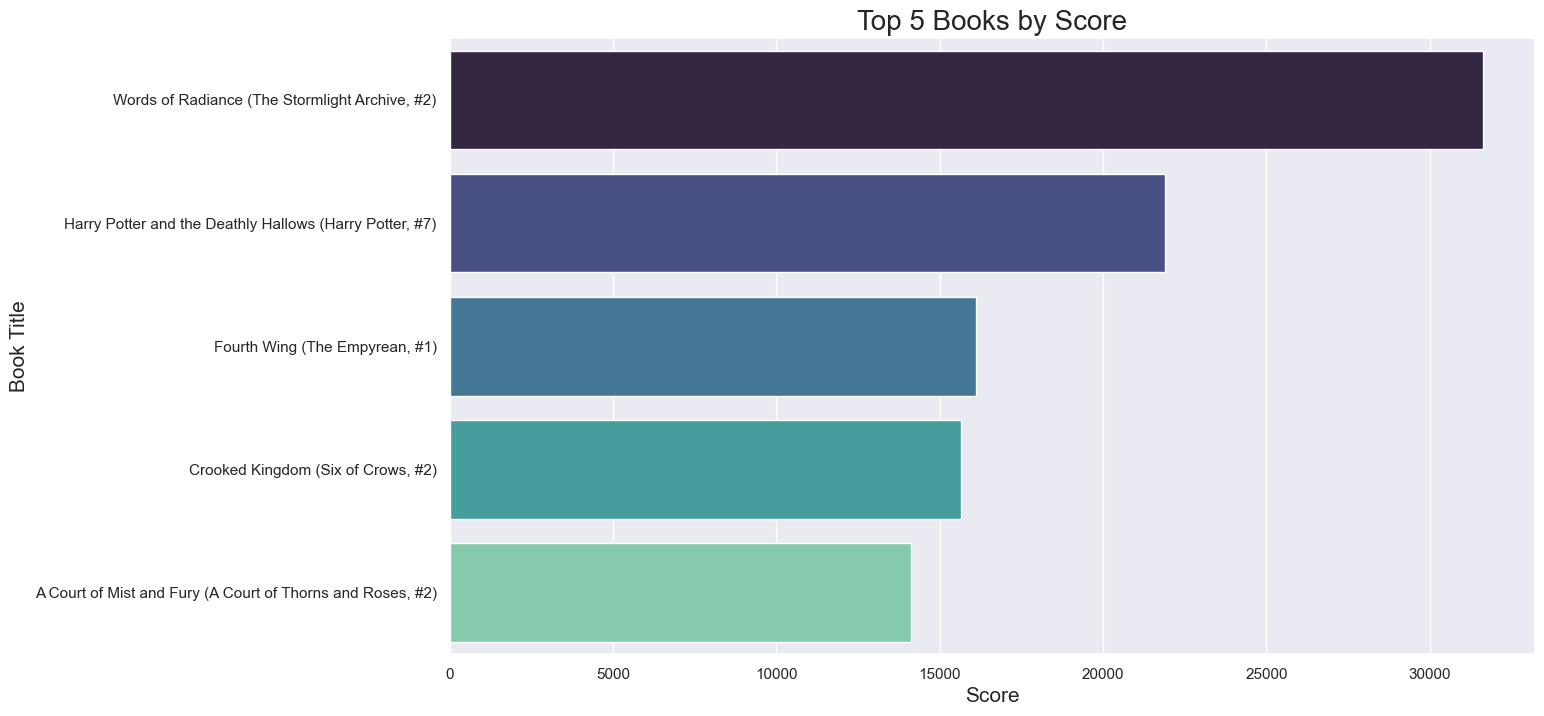

In [24]:
# 3. أفضل 5 كتب حسب الـ Score (Bar Chart)
plt.figure(figsize=(14, 8))
top_5 = df.nlargest(5, 'Scores')
sns.barplot(data=top_5, x='Scores', y='Title', palette='mako')
plt.title('Top 5 Books by Score', fontsize=20)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Book Title', fontsize=15)
plt.show()

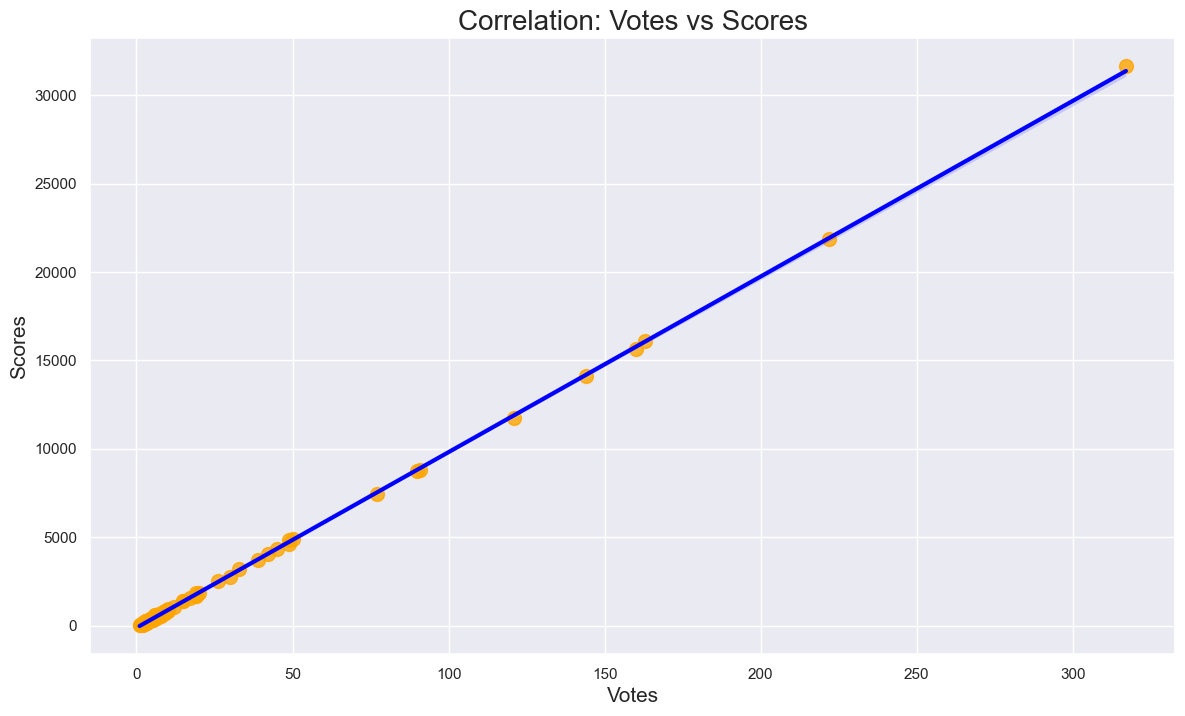

In [25]:
# 4. مقارنة بين Votes و Scores (توضيح الارتباط القوي)
plt.figure(figsize=(14, 8))
sns.regplot(data=df, x='Votes', y='Scores', scatter_kws={'color': 'orange', 's': 100}, line_kws={'color': 'blue', 'linewidth': 3})
plt.title('Correlation: Votes vs Scores', fontsize=20)
plt.xlabel('Votes', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()

C:\Users\Ahmed ELmarasy\AppData\Local\Temp\ipykernel_25112\1717420256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_popular_books, x='ratings', y='Title', palette='magma')


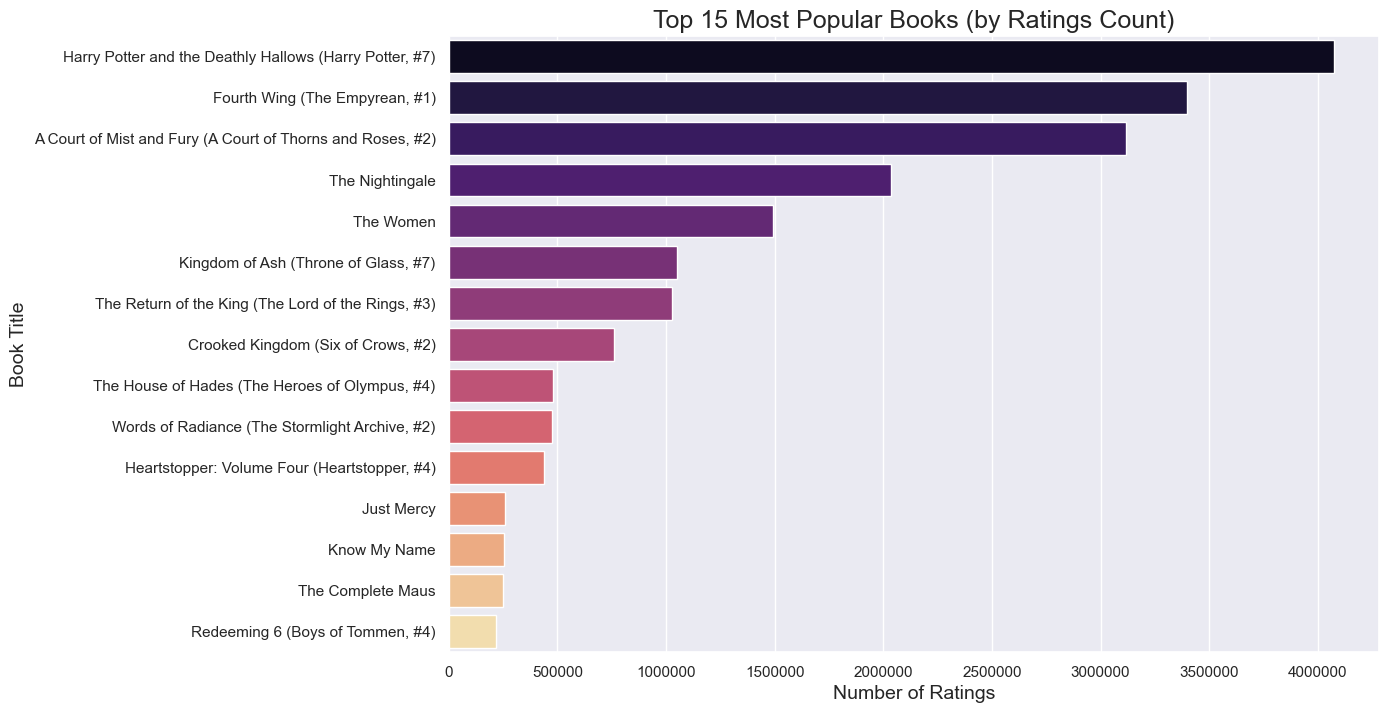

In [26]:
#5- Books with Highest Reader Engagement (الكتب ذات أعلى تفاعل من القراء).
plt.figure(figsize=(12, 8))
top_popular_books = df.nlargest(15, 'ratings')
sns.barplot(data=top_popular_books, x='ratings', y='Title', palette='magma')
plt.title('Top 15 Most Popular Books (by Ratings Count)', fontsize=18)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Book Title', fontsize=14)
plt.ticklabel_format(style='plain', axis='x') 
plt.show()